label
0    1000
1      50
2      50
Name: count, dtype: int64

label
0    1000
1      50
2      50
Name: count, dtype: int64

label
0    1000
2      20
1      20
Name: count, dtype: int64

label
0    500
1     25
2     25
Name: count, dtype: int64

label
0    1500
2      75
1      75
Name: count, dtype: int64

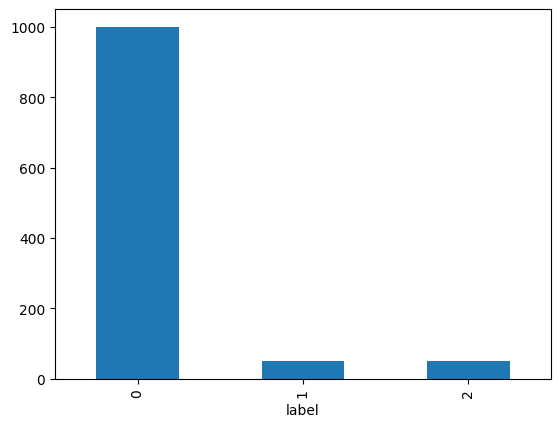

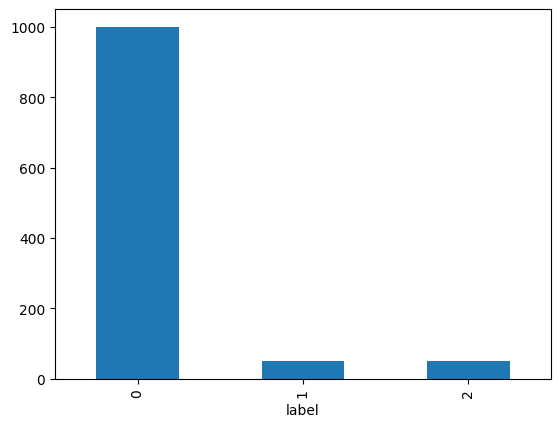

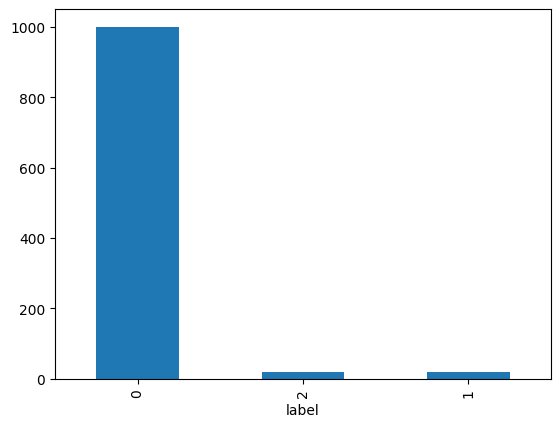

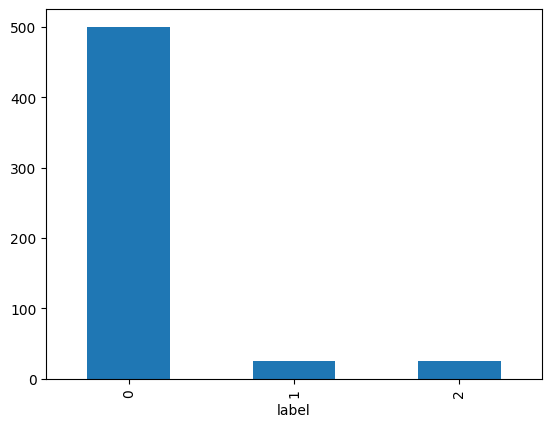

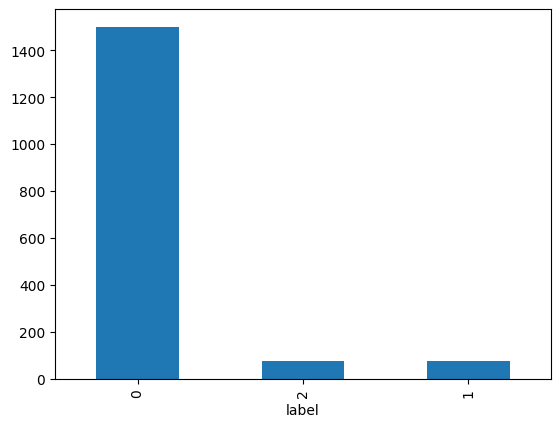

In [1]:
# Taken from Milton's Data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

def load_dataset(path: str):
    data = np.load(path)
    XX = pd.DataFrame(data["X"])
    if "yy" in data:
        yy = pd.DataFrame(data["yy"])
    else:
        yy = None
    XX.rename(columns={0: "user", 1: "item", 2: "rating"}, inplace=True)
    if yy is not None:
        yy.rename(columns={0: "user", 1: "label"}, inplace=True)
    
    XX = XX.pivot_table(index = 'user', columns='item', values = 'rating').fillna(0)
    if yy is not None:
        merged_df = pd.merge(XX, yy, left_on = 'user', right_on = 'user')
        fig, ax = plt.subplots()
        merged_df['label'].value_counts().plot(ax=ax, kind = 'bar')
        display(merged_df['label'].value_counts())
    else:
        merged_df = XX
    return merged_df
    
merged_df1 = load_dataset("data/first_batch_multi_labels.npz")
merged_df2 = load_dataset("data/second_batch_multi_labels.npz")
merged_df3 = load_dataset("data/third_batch_multi_labels.npz")
merged_df4 = load_dataset("data/fourth_batch_multi_labels.npz")
merged_df5 = load_dataset("data/fifth_batch_multi_labels.npz")



In [45]:
def aggregate_user_ratings(df):
    df = copy.deepcopy(df)
    # df = df.drop('user')
    labels_exist = False
    if 'label' in df.columns:
        labels = df['label']
        df = df.drop('label', axis = 1)
        labels_exist = True
    new_df = pd.DataFrame()
    new_df['neutral'] = (df == 0).sum(axis = 1)
    new_df['watched'] = (df == 1).sum(axis = 1)
    new_df['dislike'] = (df == -10).sum(axis = 1)
    new_df['like'] = (df == 10).sum(axis = 1)
    new_df['total'] = new_df['neutral'] + new_df['watched'] + new_df['like'] + new_df['dislike']
    if labels_exist:
        new_df['label'] = labels
    return new_df
user1 = aggregate_user_ratings(merged_df1)
user2 = aggregate_user_ratings(merged_df2)
user3 = aggregate_user_ratings(merged_df3)
user4 = aggregate_user_ratings(merged_df4)
user5 = aggregate_user_ratings(merged_df5)


#### Inter-dataset comparisons

C:\Users\teoju\AppData\Local\Temp\ipykernel_25740\1499177695.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


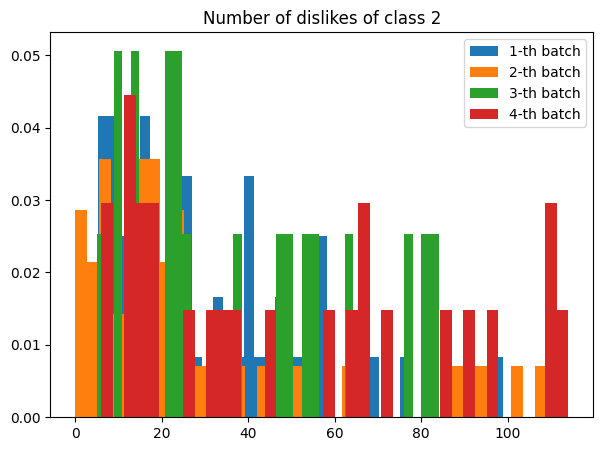

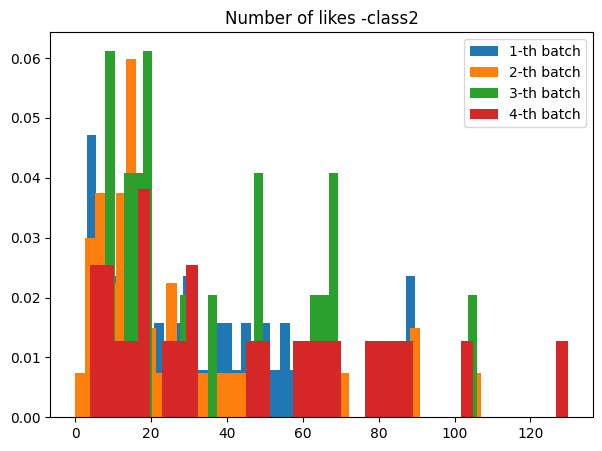

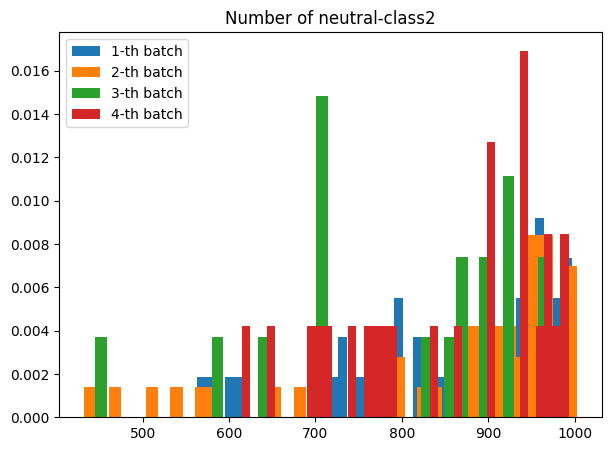

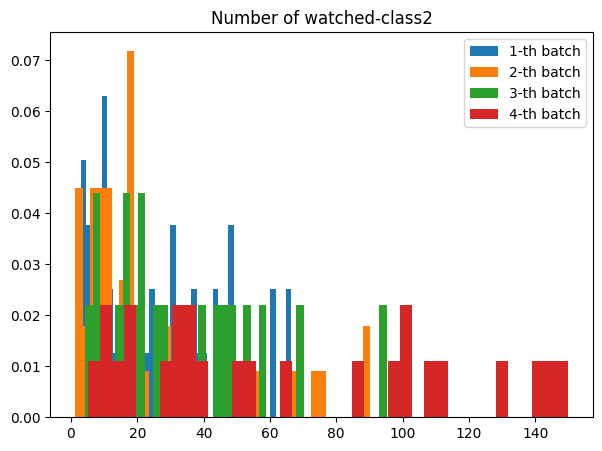

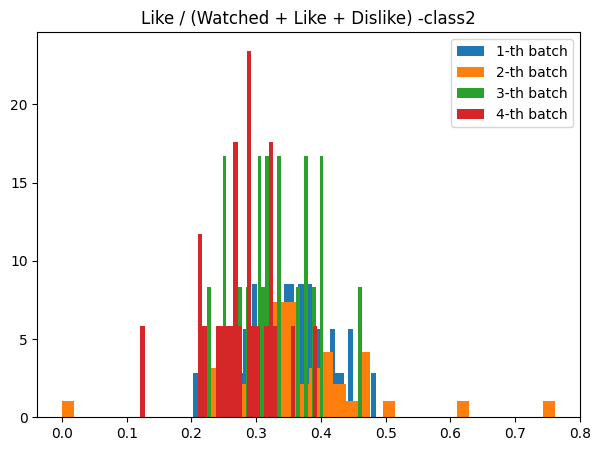

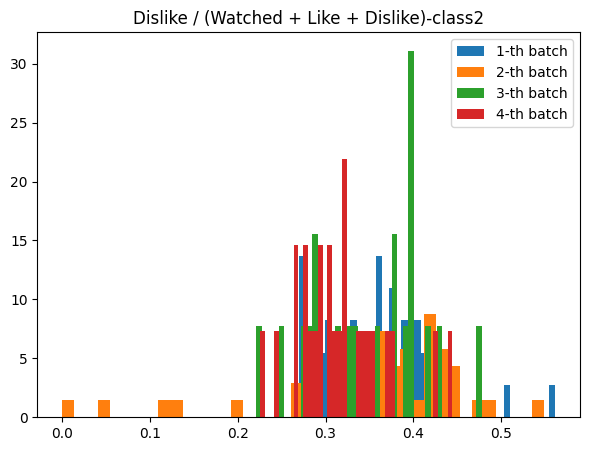

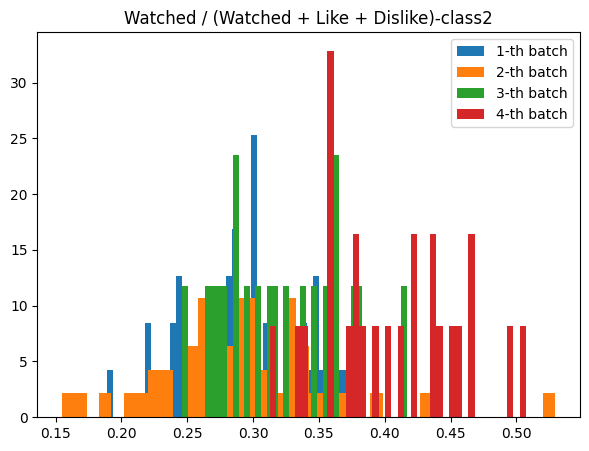

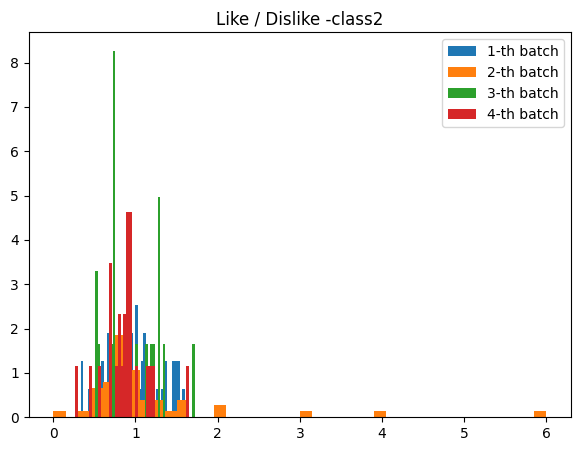

In [15]:
def view_anomaly_distribution(users: list[pd.DataFrame], anomaly_no: int, save: bool = False):
    users = copy.deepcopy(users)
    for i in range(len(users)):
        if i != 3:
            users[i].watched = users[i].watched - (users[i].watched * 0.5)
    
    plt.figure(figsize = (7,5))
    plt.legend()
    plt.title(f"Number of dislikes of class {anomaly_no}")
    for i in range(len(users)):
        if 'label' in users[i].columns:
            user = copy.deepcopy(users[i])
            user = user[user.label == anomaly_no]
        else:
            user = users[i]
        plt.hist(user.dislike, density = True, bins = 40, label=f"{i+1}-th batch")
        plt.legend()
    if save:
        plt.savefig(f"number_of_dislikes-class{anomaly_no}.png")
    plt.show()
    
    plt.figure(figsize = (7,5))
    for i in range(len(users)):
        if 'label' in users[i].columns:
            user = copy.deepcopy(users[i])
            user = user[user.label == anomaly_no]
        else:
            user = users[i]
        plt.hist(user.like, density = True, bins = 40, label=f"{i+1}-th batch")
    plt.legend()
    plt.title(f"Number of likes -class{anomaly_no}")
    if save:
        plt.savefig(f"number_of_likes-class{anomaly_no}.png")
    plt.show()

    plt.figure(figsize = (7,5))
    for i in range(len(users)):
        if 'label' in users[i].columns:
            user = copy.deepcopy(users[i])
            user = user[user.label == anomaly_no]
        else:
            user = users[i]
        plt.hist(user.neutral, density = True, bins = 40, label=f"{i+1}-th batch")
    plt.legend()
    plt.title(f"Number of neutral-class{anomaly_no}")
    if save:
        plt.savefig(f"number_of_neutral-class{anomaly_no}.png")
    plt.show()

    plt.figure(figsize = (7,5))
    for i in range(len(users)):
        if 'label' in users[i].columns:
            user = copy.deepcopy(users[i])
            user = user[user.label == anomaly_no]
        else:
            user = users[i]
        # if i != 3:
        #     plt.hist(user.watched - (0.5 * user.watched), density = True, bins = 40, label=f"{i+1}-th batch")
        # else:
        plt.hist(user.watched, density = True, bins = 40, label=f"{i+1}-th batch")
    plt.legend()
    plt.title(f"Number of watched-class{anomaly_no}")
    if save:
        plt.savefig(f"number_of_watched-class{anomaly_no}.png")
    plt.show()

    plt.figure(figsize = (7,5))
    for i in range(len(users)):
        if 'label' in users[i].columns:
            user = copy.deepcopy(users[i])
            user = user[user.label == anomaly_no]
        else:
            user = users[i]
        plt.hist(user.like / (user.watched + user.like + user.dislike), density = True, bins = 40, label=f"{i+1}-th batch")
    plt.legend()
    plt.title(f"Like / (Watched + Like + Dislike) -class{anomaly_no}")
    if save:
        plt.savefig(f"Like-to-non-neutral-class{anomaly_no}.png")
    plt.show()

    plt.figure(figsize = (7,5))
    for i in range(len(users)):
        if 'label' in users[i].columns:
            user = copy.deepcopy(users[i])
            user = user[user.label == anomaly_no]
        else:
            user = users[i]
        plt.hist(user.dislike / (user.watched + user.like + user.dislike), density = True, bins = 40, label=f"{i+1}-th batch")
    plt.legend()
    plt.title(f"Dislike / (Watched + Like + Dislike)-class{anomaly_no}")
    if save:
        plt.savefig(f"Like-to-non-neutral-class{anomaly_no}.png")
    plt.show()

    plt.figure(figsize = (7,5))
    for i in range(len(users)):
        if 'label' in users[i].columns:
            user = copy.deepcopy(users[i])
            user = user[user.label == anomaly_no]
        else:
            user = users[i]
        plt.hist(user.watched / (user.watched + user.like + user.dislike), density = True, bins = 40, label=f"{i+1}-th batch")
    plt.legend()
    plt.title(f"Watched / (Watched + Like + Dislike)-class{anomaly_no}")
    if save:
        plt.savefig(f"Watched-to-non-neutral-class{anomaly_no}.png")
    plt.show()

    plt.figure(figsize = (7,5))
    for i in range(len(users)):
        if 'label' in users[i].columns:
            user = copy.deepcopy(users[i])
            user = user[user.label == anomaly_no]
        else:
            user = users[i]
        plt.hist(user.like / (user.dislike + 1), density = True, bins = 40, label=f"{i+1}-th batch")
    plt.legend()
    plt.title(f"Like / Dislike -class{anomaly_no}")
    if save:
        plt.savefig(f"like-to-dislike-class{anomaly_no}.png")
    plt.show()

view_anomaly_distribution([user1, user2, user3, user4], anomaly_no = 2)

In [46]:
users = pd.concat([user1, user2, user3])

# anomalies = users[users.label != 0]
# anomalies['watched'] = anomalies['watched'] - 0.5 * anomalies['watched']
# users.loc[anomalies.index, 'watched'] = anomalies['watched']

In [23]:
def plot_multiclass_roc_curve(y_true, y_pred_probabilities, class_labels=[0, 1, 2]):
    # Convert labels to binary format
    binarized_labels = label_binarize(y_true, classes=np.unique(y_true))
    n_classes = binarized_labels.shape[1]
    
    # Initialize dictionaries to store metrics
    false_positive_rates = {}
    true_positive_rates = {}
    auc_scores = {}
    
    # Create color map for plotting
    colors = ['blue', 'green', 'red']
    
    # Create plot
    plt.figure()
    
    # Calculate ROC curve and AUC for each class
    for class_idx in range(n_classes):
        # Calculate ROC curve metrics
        false_positive_rates[class_idx], true_positive_rates[class_idx], _ = roc_curve(
            binarized_labels[:, class_idx],
            y_pred_probabilities[:, class_idx]
        )
        # Calculate AUC score
        auc_scores[class_idx] = auc(
            false_positive_rates[class_idx],
            true_positive_rates[class_idx]
        )
        
        # Plot ROC curve for current class
        class_label = (f"{class_labels[class_idx]}" if class_labels 
                      else f"Class {class_idx}")
        plt.plot(
            false_positive_rates[class_idx],
            true_positive_rates[class_idx],
            color=colors[class_idx],
            lw=2,
            label=f"{class_label} (AUC = {auc_scores[class_idx]:.3f})"
        )
    
    # Calculate and plot average AUC
    average_auc = sum(auc_scores.values()) / n_classes
    
    # Plot diagonal line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Customize plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.text(0.6, 0.3, f'Average AUC Score: {average_auc:.4f}')
    plt.legend(loc='lower right')
    
    # Show plot
    plt.grid(True, alpha=0.3)
    plt.show()

C:\Users\teoju\AppData\Local\Temp\ipykernel_25740\746356964.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 23.5  25.   99.5  21.   76.   57.5  74.5  22.5   8.   28.5  55.5  16.5
  13.5  27.5  66.   76.   62.    8.5  40.   49.   14.    7.5  10.5  88.
  15.   21.   13.5   6.   50.   39.    8.5  18.   80.   61.   41.5  51.5
  74.5  37.   27.   42.   14.5  25.   15.5  13.5  21.5  59.   10.   40.5
  17.   17.5  24.5  22.   14.5   8.   17.   51.5  51.   12.   17.   47.
  28.   27.5  33.   97.5 123.   11.5  40.5  20.5  68.5  14.   29.5 133.
  33.   52.    6.5 121.5  35.5   8.5  48.   21.   33.5  14.5  27.5   6.
  96.   20.5 131.5  21.   61.5  44.5  98.   69.   19.5  87.   41.5  75.
  10.5  16.   18.   39.   92.5  36.5  61.5  31.   53.5  37.5 132.   13.
   8.5  36.5  39.  111.5  23.    5.5  16.   39.5   2.5   5.5  10.5  12.5
  56.5 177.   15.   22.   10.5  73.    5.   49.5  53.5  46.   34.   35.
  21.  1

,like-prop,dislike-prop,watched-prop,like-to-dislike
0,-1.203973,-1.655958,-0.640037,0.451985
1,-1.223775,-2.022283,-0.505936,0.798508
2,-0.992553,-1.466337,-0.885307,0.473784
3,-1.321756,-1.495028,-0.651598,0.173272
4,-1.295046,-2.571339,-0.411855,1.276293


,like-prop,dislike-prop,watched-prop,like-to-dislike
0,-1.203973,-1.655958,-0.640037,0.451985
1,-1.223775,-2.022283,-0.505936,0.798508
2,-0.992553,-1.466337,-0.885307,0.473784
3,-1.321756,-1.495028,-0.651598,0.173272
4,-1.295046,-2.571339,-0.411855,1.276293


Degree 1


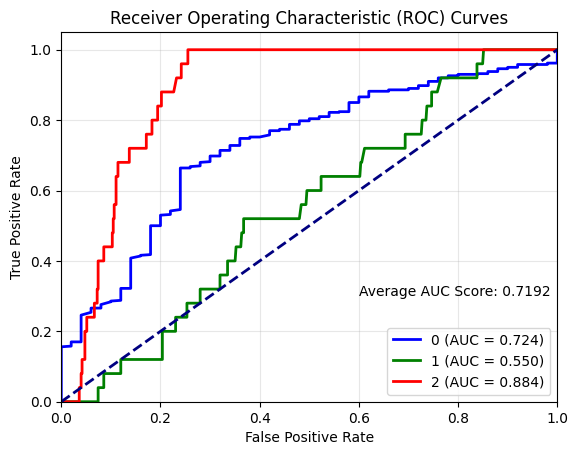

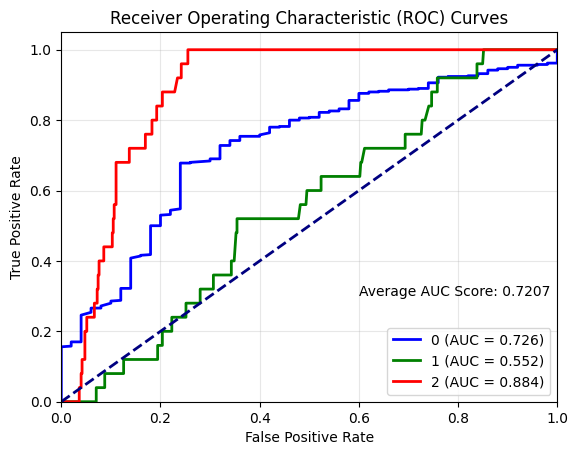

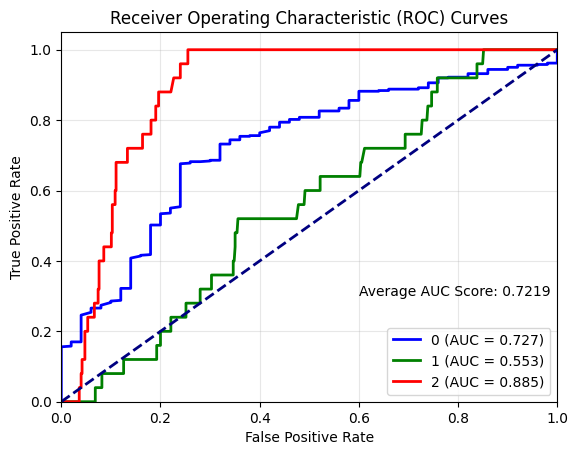

Degree 2


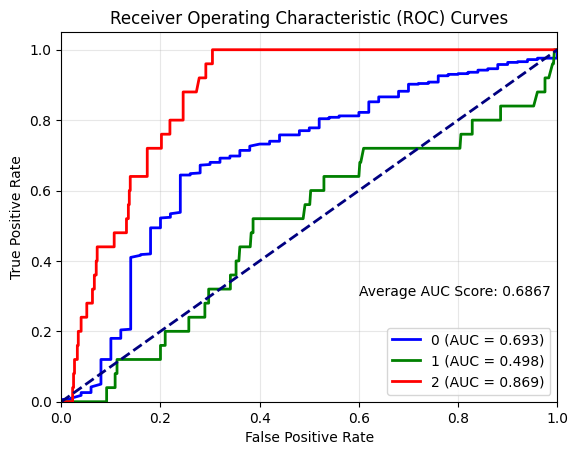

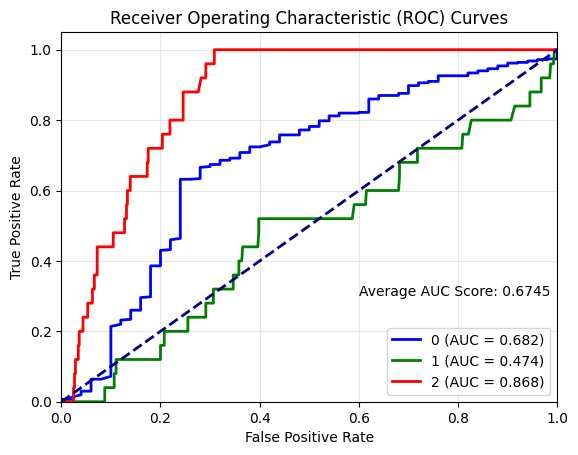

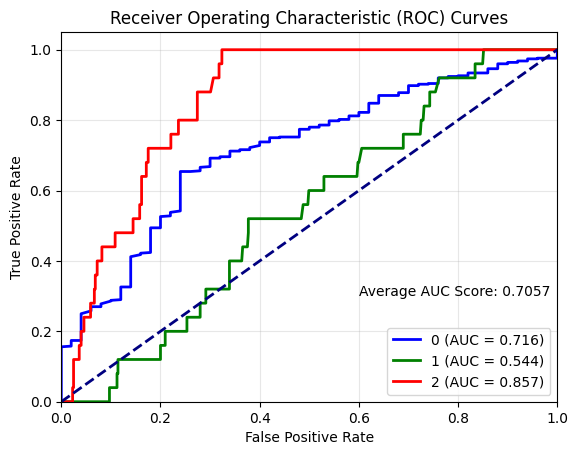

Degree 3


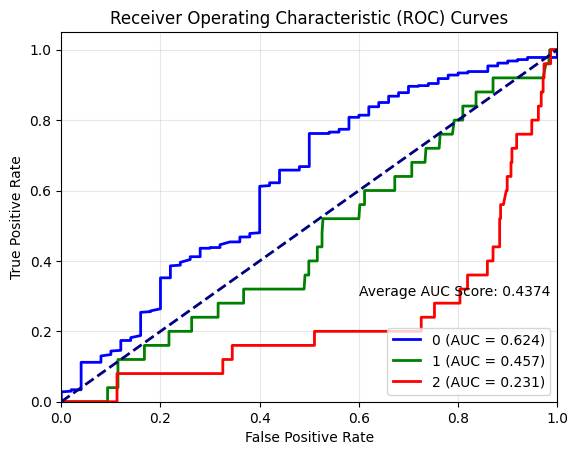

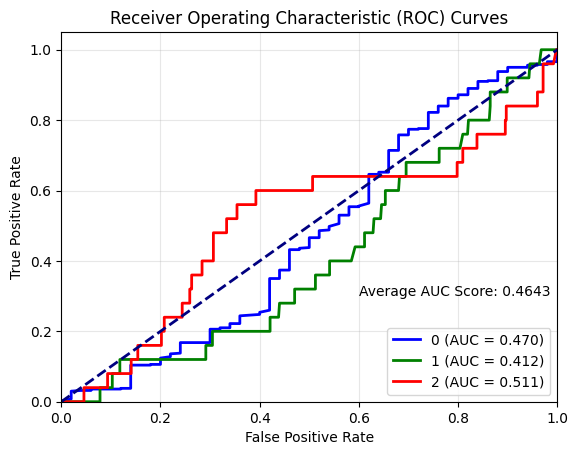

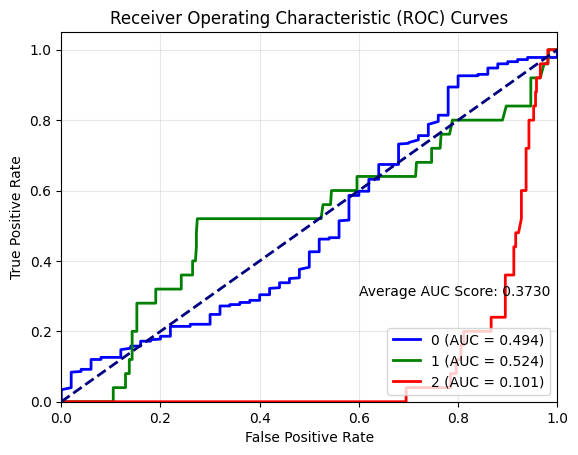

Degree 4


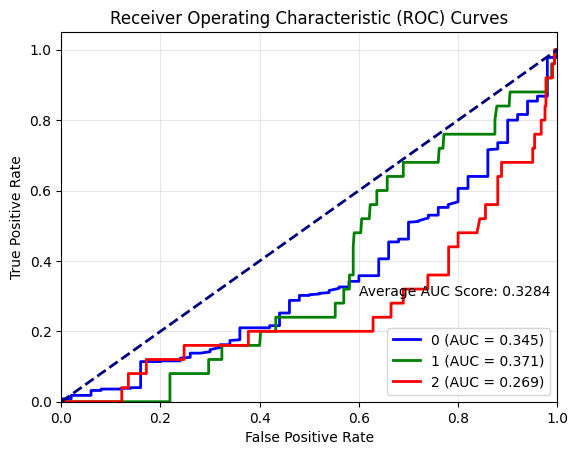

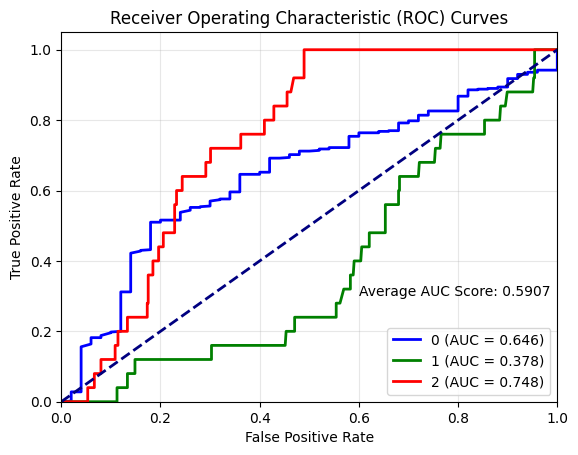

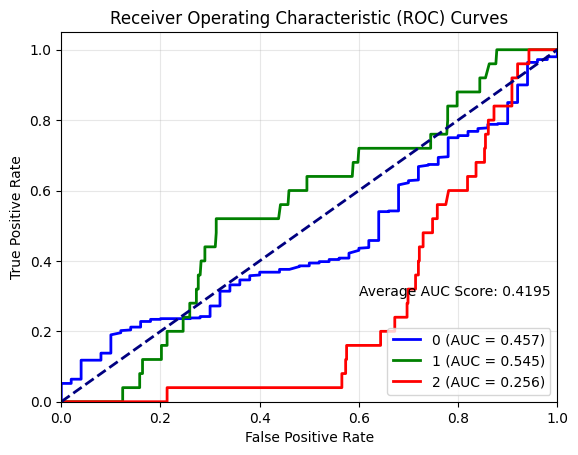

Degree 5


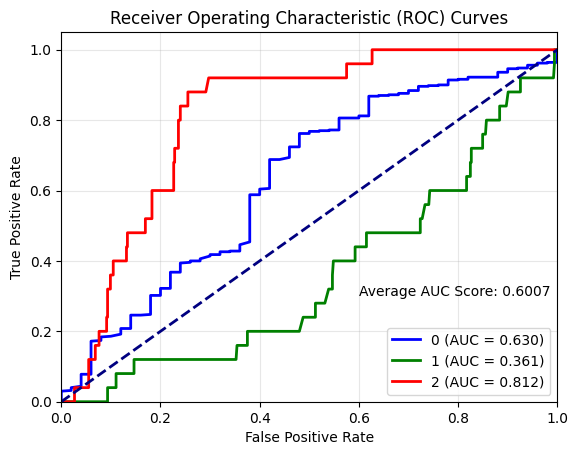

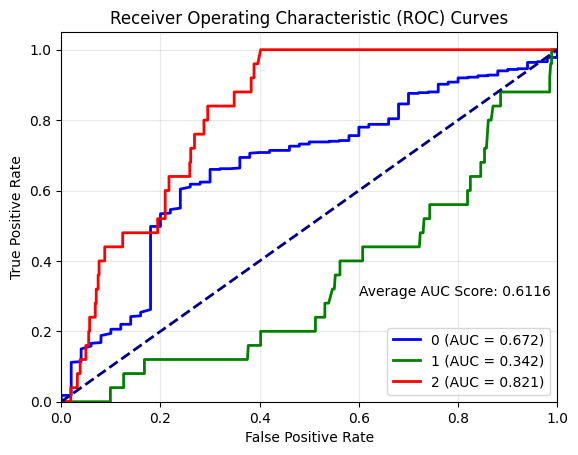

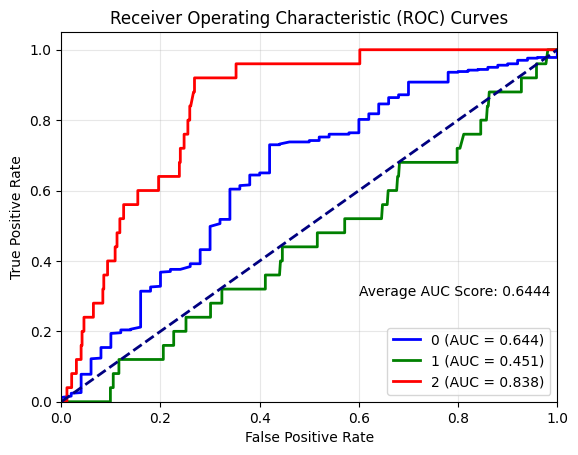

Degree 6


C:\Users\teoju\Code\SMU_Code\2024-2025-S1\CS421\cs421-milton-project\cs421-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


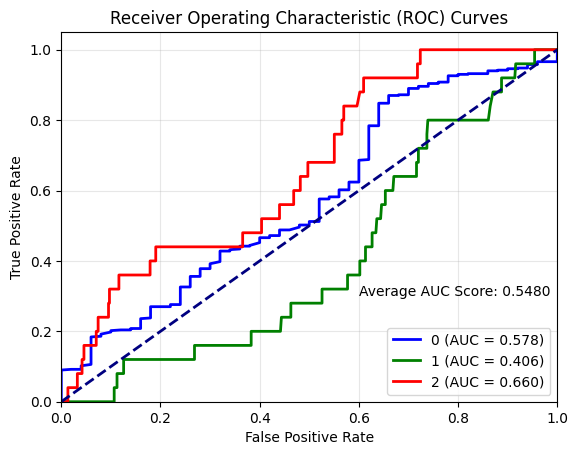

C:\Users\teoju\Code\SMU_Code\2024-2025-S1\CS421\cs421-milton-project\cs421-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


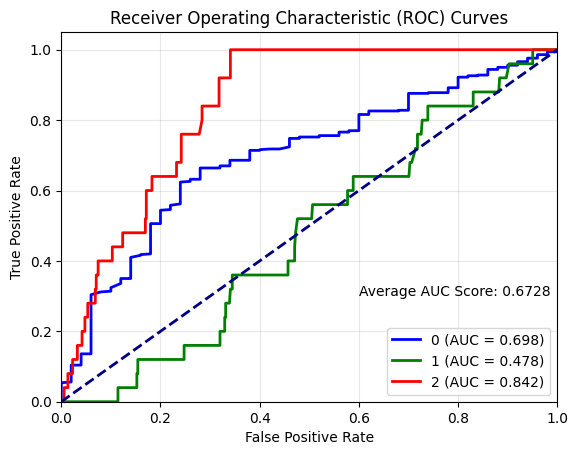

C:\Users\teoju\Code\SMU_Code\2024-2025-S1\CS421\cs421-milton-project\cs421-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


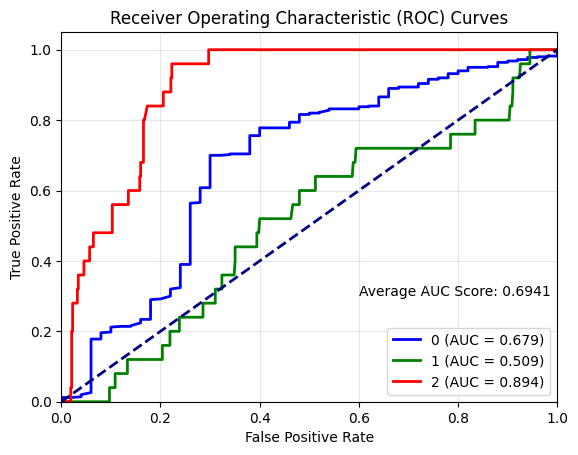

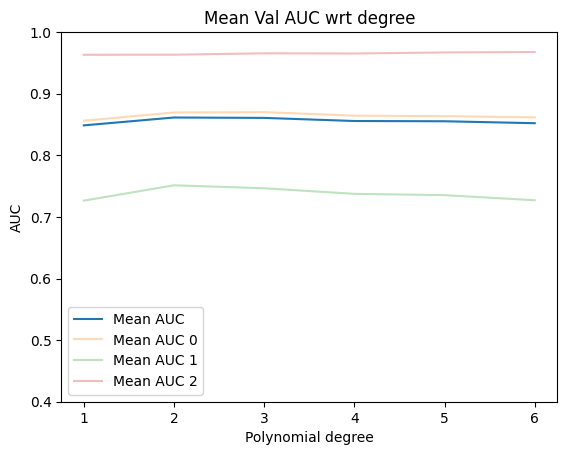

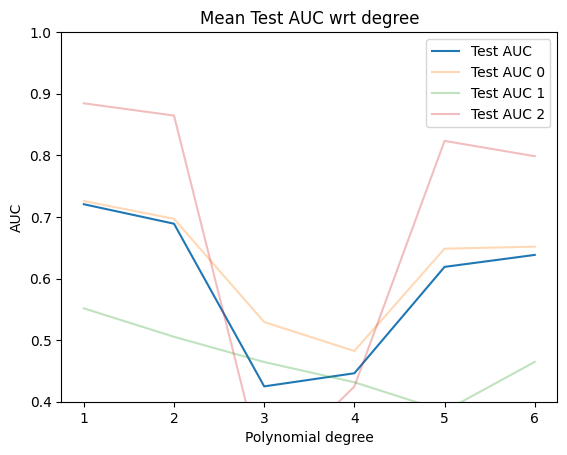

In [49]:
from collections import namedtuple
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
DataSplit = namedtuple('DataSplit', ['X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test'])
# def remove_outliers(df, columns):
#     for col in columns:
#         Q1 = df[col].quantile(0.30)
#         Q3 = df[col].quantile(0.60)
#         IQR = Q3 - Q1
        
#         # Define the outlier range
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Remove rows with outliers
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
#     return df

def shift_known_anomalies(x, label):
    if label == 0: 
        return x
    else:
        return 0.5 * x

def data_processing(df, test_df, test_seed=41123123):
    from sklearn.model_selection import train_test_split
    # Scale all anomaly watched ratings by half.
    df = copy.deepcopy(df)
    df.loc[df['label'] != 0, 'watched'] *= 0.5
    
    df['total'] = df['like'] + df['dislike'] + df['watched']
    df['like-prop'] = np.log(df['like'] + 1) - np.log(df['total'] + 1)
    df['dislike-prop'] = np.log(df['dislike'] + 1) - np.log(df['total'] + 1)
    df['watched-prop'] = np.log(df['watched'] + 1) - np.log(df['total'] + 1)
    df['like-to-dislike'] = np.log(df['like'] + 1) - np.log(df['dislike'] + 1)

    test_df = copy.deepcopy(test_df)
    test_df['like-prop'] = np.log(test_df['like'] + 1) - np.log(test_df['total'] + 1)
    test_df['dislike-prop'] = np.log(test_df['dislike'] + 1) - np.log(test_df['total'] + 1)
    test_df['watched-prop'] = np.log(test_df['watched'] + 1) - np.log(test_df['total'] + 1)
    test_df['like-to-dislike'] = np.log(test_df['like'] + 1) - np.log(test_df['dislike'] + 1)
    # df['like-odds'] = np.log(df['like'] + 1) - np.log(df['total'] - df['like'] + 1)
    # df['dislike-odds'] = np.log(df['dislike'] + 1) - np.log(df['total'] - df['dislike'] + 1)
    # df['watched-odds'] = np.log(df['watched'] + 1) - np.log(df['total'] - df['watched'] + 1)
    
    Xs = df.drop(['total', 'like', 'dislike', 'watched', 'neutral', 'label'], axis = 1)
    display(Xs.head(5))
    ys = df['label']

    X_test = test_df.drop(['total', 'like', 'dislike', 'watched', 'neutral', 'label'], axis = 1)
    display(Xs.head(5))
    y_test = test_df['label']
    return DataSplit(Xs, None, X_test, ys, None, y_test)

def evaluate_model(lr, X, y, degree, test = False, show_auc = False):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    y_prob = lr.predict_proba(X)
    if show_auc:
        plot_multiclass_roc_curve(y, y_prob)
    y_binarized = label_binarize(y, classes = [0,1,2])
    fprs = {}
    tprs = {}
    roc_aucs = {}
    for i in range(3):
        fprs[i], tprs[i], _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_aucs[i] = auc(fprs[i], tprs[i])
    # plot_roc_curve(fprs, tprs, roc_aucs, f'Degree {degree}: Test Set' if test else f'Degree {degree}')
    return roc_aucs
    

def baseline_model(df, test_df, degree, test_seed=41123123):
    from sklearn.model_selection import train_test_split, StratifiedKFold
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc
    from imblearn.over_sampling import SMOTE
    from sklearn.ensemble import RandomForestClassifier
    import statistics

    split = data_processing(df, test_df)
    skf = StratifiedKFold(n_splits=3, shuffle = True, random_state=123125312)
    # skf.get_n_splits(split.Xs, split.ys)
    results = {}
    for i in range(1,degree+1):
        print(f"Degree {i}")
        degree_results = {}
        for j, (train_idx, val_idx) in enumerate(skf.split(split.X_train, split.y_train)):
            X_train, X_val, y_train, y_val = split.X_train.iloc[train_idx], split.X_train.iloc[val_idx], split.y_train.iloc[train_idx], split.y_train.iloc[val_idx]
            
            sc = StandardScaler().fit(X_train)
            X_train_norm = sc.transform(X_train)
            X_val_norm = sc.transform(X_val)
            X_test_norm = sc.transform(split.X_test)

            X_train_norm = np.clip(X_train_norm, a_min = -2, a_max=2)
            X_val_norm = np.clip(X_val_norm, a_min=-2, a_max=2)
            X_test_norm = np.clip(X_test_norm, a_min=-2, a_max=2)
            
            if i > 1:
                poly = PolynomialFeatures(degree = i).fit(X_train_norm, X_val_norm)
                X_train_poly = poly.transform(X_train_norm)
                X_val_poly = poly.transform(X_val_norm)
                X_test_poly = poly.transform(X_test_norm)
    
                sc2 = StandardScaler().fit(X_train_poly, y_train)
                X_train_poly_norm = sc2.transform(X_train_poly)
                X_val_poly_norm = sc2.transform(X_val_poly)
                X_test_poly_norm = sc2.transform(X_test_poly)

                X_train_final = np.clip(X_train_poly_norm, a_min = -2, a_max = 2)
                X_val_final = np.clip(X_val_poly_norm, a_min = -2, a_max = 2)
                X_test_final = np.clip(X_test_poly_norm, a_min = -2, a_max = 2)
                # X_train_final = X_train_poly
                # X_val_final = X_val_poly
            else:
                X_train_final = copy.deepcopy(X_train_norm)
                X_val_final = copy.deepcopy(X_val_norm)
                X_test_final = copy.deepcopy(X_test_norm)

            lr = LogisticRegression().fit(X_train_final, y_train)
            # clf = RandomForestClassifier(n_estimators=200, max_depth = 30, min_samples_split=3, random_state=1200102, class_weight='balanced').fit(X_train_final, y_train)
            roc_aucs = evaluate_model(lr, X_val_final, y_val, i, show_auc = False)
            degree_results[f'Fold_{j}'] = {
                0: roc_aucs[0],
                1: roc_aucs[1],
                2: roc_aucs[2]
            }
            test_roc_aucs = evaluate_model(lr, X_test_final, split.y_test, i, show_auc = True)
            degree_results[f'Test_Fold_{j}'] = {
                0: test_roc_aucs[0],
                1: test_roc_aucs[1],
                2: test_roc_aucs[2]
            }
        degree_results['Mean_AUC_0'] = statistics.mean([degree_results[f'Fold_{k}'][0] for k in range(3)])
        degree_results['Mean_AUC_1'] = statistics.mean([degree_results[f'Fold_{k}'][1] for k in range(3)])
        degree_results['Mean_AUC_2'] = statistics.mean([degree_results[f'Fold_{k}'][2] for k in range(3)])
        degree_results['Mean_AUC'] = statistics.mean([degree_results[f'Mean_AUC_{k}'] for k in range(3)])
        degree_results['Test_AUC_0'] = statistics.mean([degree_results[f'Test_Fold_{k}'][0] for k in range(3)])
        degree_results['Test_AUC_1'] = statistics.mean([degree_results[f'Test_Fold_{k}'][1] for k in range(3)])
        degree_results['Test_AUC_2'] = statistics.mean([degree_results[f'Test_Fold_{k}'][2] for k in range(3)])
        degree_results['Test_AUC'] = statistics.mean([degree_results[f'Test_AUC_{k}'] for k in range(3)])
        results[i] = copy.deepcopy(degree_results)
    plt.figure()
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC'] for i in range(1,degree + 1)], label = 'Mean AUC')
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_0'] for i in range(1, degree + 1)], label = 'Mean AUC 0', alpha = 0.3)
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_1'] for i in range(1, degree + 1)], label = 'Mean AUC 1', alpha = 0.3)
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_2'] for i in range(1, degree + 1)], label = 'Mean AUC 2', alpha = 0.3)
    plt.title('Mean Val AUC wrt degree')
    plt.xlabel('Polynomial degree')
    plt.ylabel('AUC')
    plt.ylim([0.4, 1.0])
    plt.legend()
    # plt.savefig(f"./poly-log-reg-kfold.png")
    plt.show()

    plt.figure()
    plt.plot([x for x in range(1,degree+1)], [results[i]['Test_AUC'] for i in range(1,degree + 1)], label = 'Test AUC')
    plt.plot([x for x in range(1,degree+1)], [results[i]['Test_AUC_0'] for i in range(1, degree + 1)], label = 'Test AUC 0', alpha = 0.3)
    plt.plot([x for x in range(1,degree+1)], [results[i]['Test_AUC_1'] for i in range(1, degree + 1)], label = 'Test AUC 1', alpha = 0.3)
    plt.plot([x for x in range(1,degree+1)], [results[i]['Test_AUC_2'] for i in range(1, degree + 1)], label = 'Test AUC 2', alpha = 0.3)
    plt.title('Mean Test AUC wrt degree')
    plt.xlabel('Polynomial degree')
    plt.ylabel('AUC')
    plt.ylim([0.4, 1.0])
    plt.legend()
    # plt.savefig(f"./poly-log-reg-kfold.png")
    plt.show()
    return pd.DataFrame(results)
    # pass

# split = data_processing(new_df)
results = baseline_model(users, user4, degree = 6)

In [50]:
results

,1,2,3,4,5,6
Fold_0,"{0: 0.8519, 1: 0.7242307692307691, 2: 0.977259...","{0: 0.8704249999999999, 1: 0.7386778846153845,...","{0: 0.8727, 1: 0.7335576923076923, 2: 0.987860...","{0: 0.8656625, 1: 0.719735576923077, 2: 0.9873...","{0: 0.8680125, 1: 0.7204086538461538, 2: 0.987...","{0: 0.866775, 1: 0.7182451923076923, 2: 0.9877..."
Test_Fold_0,"{0: 0.7238400000000001, 1: 0.5498666666666666,...","{0: 0.6931999999999999, 1: 0.4981714285714286,...","{0: 0.62396, 1: 0.4574095238095239, 2: 0.23097...","{0: 0.34468, 1: 0.37120000000000003, 2: 0.2692...","{0: 0.62964, 1: 0.3608380952380952, 2: 0.81161...","{0: 0.57804, 1: 0.4060571428571429, 2: 0.66}"
Fold_1,"{0: 0.85070625, 1: 0.7234495192307692, 2: 0.94...","{0: 0.8571437500000001, 1: 0.7497235576923077,...","{0: 0.85838125, 1: 0.7484735576923077, 2: 0.94...","{0: 0.8507062499999999, 1: 0.7408533653846153,...","{0: 0.8487187500000001, 1: 0.7394110576923076,...","{0: 0.84533125, 1: 0.7257572115384616, 2: 0.94..."
Test_Fold_1,"{0: 0.7261600000000001, 1: 0.5519619047619048,...","{0: 0.6815200000000001, 1: 0.47405714285714284...","{0: 0.4704, 1: 0.41165714285714283, 2: 0.51081...","{0: 0.6455599999999999, 1: 0.3783619047619048,...","{0: 0.6715599999999999, 1: 0.34205714285714284...","{0: 0.69812, 1: 0.4784380952380952, 2: 0.84194..."
Fold_2,"{0: 0.8659375, 1: 0.7316586538461538, 2: 0.965...","{0: 0.8810250000000001, 1: 0.7655288461538462,...","{0: 0.8791624999999998, 1: 0.7576201923076923,...","{0: 0.8766875, 1: 0.7517788461538462, 2: 0.961...","{0: 0.8740125, 1: 0.7461778846153847, 2: 0.965...","{0: 0.8726125, 1: 0.7372836538461538, 2: 0.969..."
Test_Fold_2,"{0: 0.7273999999999999, 1: 0.5529142857142857,...","{0: 0.7161199999999999, 1: 0.5440761904761905,...","{0: 0.49363999999999997, 1: 0.5243047619047619...","{0: 0.45675999999999994, 1: 0.5452571428571429...","{0: 0.64412, 1: 0.4514666666666667, 2: 0.8376}","{0: 0.67912, 1: 0.509447619047619, 2: 0.893752..."
Mean_AUC_0,0.856181,0.869531,0.870081,0.864352,0.863581,0.861573
Mean_AUC_1,0.726446,0.75131,0.74655,0.737456,0.735333,0.727095
Mean_AUC_2,0.963205,0.963325,0.965625,0.965304,0.967003,0.967748
Mean_AUC,0.848611,0.861389,0.860752,0.855704,0.855306,0.852139


In [ ]:
from collections import namedtuple
DataSplit = namedtuple('DataSplit', ['X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test'])
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.30)
        Q3 = df[col].quantile(0.60)
        IQR = Q3 - Q1
        
        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

def data_processing(df, test_seed=41123123):
    from sklearn.model_selection import train_test_split
    
    df = copy.deepcopy(df)
    df['total'] = df['like'] + df['dislike'] + df['watched']
    df['like-prop'] = np.log(df['like'] + 1) - np.log(df['total'] + 1)
    df['dislike-prop'] = np.log(df['dislike'] + 1) - np.log(df['total'] + 1)
    df['watched-prop'] = np.log(df['watched'] + 1) - np.log(df['total'] + 1)
    df['like-to-dislike'] = np.log(df['like'] + 1) - np.log(df['dislike'] + 1)
    # df['like-odds'] = np.log(df['like'] + 1) - np.log(df['total'] - df['like'] + 1)
    # df['dislike-odds'] = np.log(df['dislike'] + 1) - np.log(df['total'] - df['dislike'] + 1)
    # df['watched-odds'] = np.log(df['watched'] + 1) - np.log(df['total'] - df['watched'] + 1)
    display(df.head())
    outliers = df[df.label != 0]
    # normal_users = remove_outliers(df[df.label == 0], ['like-prop', 'dislike-prop', 'watched-prop', 'like-to-dislike'])
    # df = pd.concat([normal_users, outliers]) 
    y = df['label']
    X = df.drop(['total', 'like', 'dislike', 'watched', 'neutral', 'label'], axis = 1)
    display(X.head(5))
    Xs, X_test, ys, y_test = train_test_split(X, y, random_state=test_seed, stratify=y)
    return DataSplit(Xs, None, X_test, ys, None, y_test)

def data_processing_eval(df):
    from sklearn.model_selection import train_test_split
    
    df = copy.deepcopy(df)
    df['total'] = df['like'] + df['dislike'] + df['watched']
    df['like-prop'] = np.log(df['like'] + 1) - np.log(df['total'] + 1)
    df['dislike-prop'] = np.log(df['dislike'] + 1) - np.log(df['total'] + 1)
    df['watched-prop'] = np.log(df['watched'] + 1) - np.log(df['total'] + 1)
    df['like-to-dislike'] = np.log(df['like'] + 1) - np.log(df['dislike'] + 1)
    
    X = df.drop(['total', 'like', 'dislike', 'watched', 'neutral'], axis = 1)
    return X


def evaluate_model(lr, X, y, degree, test = False):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    y_prob = lr.predict_proba(X)
    y_binarized = label_binarize(y, classes = [0,1,2])
    fprs = {}
    tprs = {}
    roc_aucs = {}
    for i in range(3):
        fprs[i], tprs[i], _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_aucs[i] = auc(fprs[i], tprs[i])
    plot_roc_curve(fprs, tprs, roc_aucs, f'Degree {degree}: Test Set' if test else f'Degree {degree}')
    return roc_aucs
    

def select_final_model(df, selected_degree, test_seed=41123123):
    from sklearn.model_selection import train_test_split, StratifiedKFold
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc
    from imblearn.over_sampling import SMOTE
    from sklearn.ensemble import RandomForestClassifier
    import statistics

    split = data_processing(df, test_seed)
    # skf.get_n_splits(split.Xs, split.ys)
    results = {}
    degree_results = {}
    Xs, X_test, ys, y_test = split.X_train, split.X_test, split.y_train, split.y_test
    sc1 = StandardScaler().fit(Xs)
    X_train_norm = sc1.transform(Xs)
    X_test_norm = sc1.transform(split.X_test)
    X_train_norm = np.clip(X_train_norm, a_min = -2, a_max=2)
    X_test_norm = np.clip(X_test_norm, a_min=-2, a_max=2)
    
    if selected_degree > 1:
        poly = PolynomialFeatures(degree = selected_degree).fit(X_train_norm, X_test_norm)
        X_train_poly = poly.transform(X_train_norm)
        X_test_poly = poly.transform(X_test_norm)
    
        sc2 = StandardScaler().fit(X_train_poly)
        X_train_poly_norm = sc2.transform(X_train_poly)
        X_test_poly_norm = sc2.transform(X_test_poly)

        X_train_final = np.clip(X_train_poly_norm, a_min = -2, a_max = 2)
        X_test_final = np.clip(X_test_poly_norm, a_min=-2, a_max = 2)
    else:
        X_train_final = copy.deepcopy(X_train_norm)
        X_test_final = copy.deepcopy(X_test_norm)

    lr = LogisticRegression(class_weight=None).fit(X_train_final, ys) # train on the whole train set
    roc_aucs = evaluate_model(lr, X_test_final, y_test, selected_degree)
    print("AUC of class 0: ", roc_aucs[0])
    print("AUC of class 1: ", roc_aucs[1])
    print("AUC of class 2: ", roc_aucs[2])
    print("Mean AUC: ", statistics.mean(roc_aucs))

    data_with_no_labels = np.load("third_batch_multi.npz")
    
    df_X = pd.DataFrame(data_with_no_labels["X"], columns=["user", "item", "rating"])
    
    df_X = df_X.pivot_table(index = 'user', columns='item', values = 'rating').fillna(0)
    agg_df = aggregate_user_ratings(df_X)
    X_new = data_processing_eval(agg_df)
    
    display(X_new.head())

    X_new_norm = sc1.transform(X_new)
    X_new_norm = np.clip(X_new_norm, a_min=-2, a_max=2)
    if selected_degree > 1:
        X_new_poly = poly.transform(X_new_norm)
        X_new_poly_norm = sc2.transform(X_new_poly)
        X_new_final = np.clip(X_new_poly_norm, a_min=-2, a_max=2)
    else:
        X_new_final = copy.deepcopy(X_new_norm)
    y_pred_prob_unseen = lr.predict_proba(X_new_final)
    print(y_pred_prob_unseen)
    y_pred_prob = lr.predict(X_new_final)
    df_anomaly_scores = pd.DataFrame({
        'z0': y_pred_prob_unseen[:,0],
        'z1': y_pred_prob_unseen[:,1],
        'z2': y_pred_prob_unseen[:,2],
        'prediction': np.argmax(y_pred_prob_unseen, axis = 1)
    })
    display(df_anomaly_scores)

    import seaborn as sns
    plt.figure(figsize=(8, 6))
    sns.countplot(x='prediction', data=df_anomaly_scores, palette='viridis', hue='prediction')
    plt.show()
    
    import time
    np.savez(f"./cs421-g1-team3-week10-{time.time_ns()//1_000_000}.npz", scores=df_anomaly_scores.to_numpy())
    
    return df_anomaly_scores
    # pass

# split = data_processing(new_df)
results = select_final_model(new_df, selected_degree=1)

In [ ]:
split.X_train

In [ ]:
from collections import namedtuple
DataSplit = namedtuple('DataSplit', ['X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test'])
def data_processing_binary_class(df):
    from sklearn.model_selection import train_test_split
    
    df = copy.deepcopy(df)
    df['total'] = df['like'] + df['dislike'] + df['watched']
    df['like-prop'] = np.log(df['like'] + 1) - np.log(df['total'] + 1)
    df['dislike-prop'] = np.log(df['dislike'] + 1) - np.log(df['total'] + 1)
    df['watched-prop'] = np.log(df['watched'] + 1) - np.log(df['total'] + 1)
    # df['like-to-dislike'] = np.log(df['like'] + 1) - np.log(df['dislike'] + 1)
    # df['like-odds'] = np.log(df['like'] + 1) - np.log(df['total'] - df['like'] + 1)
    # df['dislike-odds'] = np.log(df['dislike'] + 1) - np.log(df['total'] - df['dislike'] + 1)
    # df['watched-odds'] = np.log(df['watched'] + 1) - np.log(df['total'] - df['watched'] + 1)
    y = df['label']
    y = pd.Series([(1 if x != 0 else 0) for x in y])
    # convert into binary classification
    X = df.drop(['total', 'like', 'dislike', 'watched', 'neutral', 'label'], axis = 1)
    display(X.head(5))
    Xs, X_test, ys, y_test = train_test_split(X, y, random_state=41123123, test_size=0.3, stratify=y)
    return DataSplit(Xs, None, X_test, ys, None, y_test)

def evaluate_model(lr, X, y, degree):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    y_prob = lr.predict_proba(X)
    y_binarized = label_binarize(y, classes = [0,1,2])
    fprs = {}
    tprs = {}
    roc_aucs = {}
    for i in range(2):
        fprs[i], tprs[i], _ = roc_curve(y_binarized[:, i], y_prob[:, i])
        roc_aucs[i] = auc(fprs[i], tprs[i])
    plot_roc_curve(fprs, tprs, roc_aucs, f'Degree {degree}')
    return roc_aucs

def baseline_binary_class_model(df, degree):
    from sklearn.model_selection import train_test_split, StratifiedKFold
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
    from sklearn.pipeline import Pipeline
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, auc
    from imblearn.over_sampling import SMOTE
    from sklearn.ensemble import RandomForestClassifier
    import statistics

    split = data_processing_binary_class(df)
    skf = StratifiedKFold(n_splits=3, shuffle = True, random_state=123125312)
    # skf.get_n_splits(split.Xs, split.ys)
    results = {}
    for i in range(1,degree+1):
        degree_results = {}
        for j, (train_idx, val_idx) in enumerate(skf.split(split.X_train, split.y_train)):
            X_train, X_val, y_train, y_val = split.X_train.iloc[train_idx], split.X_train.iloc[val_idx], split.y_train.iloc[train_idx], split.y_train.iloc[val_idx]
            # display(X_train)
            # display(y_train)

            # Over sample minority classes
            # sm = SMOTE(sampling_strategy='not majority', random_state=41231314)
            # X_train, y_train = sm.fit_resample(X_train, y_train)

            
            sc = StandardScaler().fit(X_train)
            X_train_norm = sc.transform(X_train)
            X_val_norm = sc.transform(X_val)

            X_train_norm = np.clip(X_train_norm, a_min = -2, a_max=2)
            X_val_norm = np.clip(X_val_norm, a_min=-2, a_max=2)
            
            if i > 1:
                poly = PolynomialFeatures(degree = i).fit(X_train_norm, X_val_norm)
                X_train_poly = poly.transform(X_train_norm)
                X_val_poly = poly.transform(X_val_norm)
    
                sc2 = StandardScaler().fit(X_train_poly, y_train)
                X_train_poly_norm = sc2.transform(X_train_poly)
                X_val_poly_norm = sc2.transform(X_val_poly)

                X_train_final = np.clip(X_train_poly_norm, a_min = -2, a_max = 2)
                X_val_final = np.clip(X_val_poly_norm, a_min = -2, a_max = 2)
                # X_train_final = X_train_poly
                # X_val_final = X_val_poly
            else:
                X_train_final = copy.deepcopy(X_train_norm)
                X_val_final = copy.deepcopy(X_val_norm)

            lr = LogisticRegression(class_weight='balanced').fit(X_train_final, y_train)
            # clf = RandomForestClassifier(n_estimators=200, max_depth = 30, min_samples_split=3, random_state=1200102, class_weight='balanced').fit(X_train_final, y_train)
            roc_aucs = evaluate_model(lr, X_val_final, y_val, i)
            # roc_aucs = evaluate_model(clf, X_val_final, y_val, i)
            degree_results[f'Fold_{j}'] = {
                0: roc_aucs[0],
                1: roc_aucs[1],
                # 2: roc_aucs[2]
            }
        degree_results['Mean_AUC_0'] = statistics.mean([degree_results[f'Fold_{k}'][0] for k in range(3)])
        degree_results['Mean_AUC_1'] = statistics.mean([degree_results[f'Fold_{k}'][1] for k in range(3)])
        # degree_results['Mean_AUC_2'] = statistics.mean([degree_results[f'Fold_{k}'][2] for k in range(3)])
        degree_results['Mean_AUC'] = statistics.mean([degree_results[f'Mean_AUC_{k}'] for k in range(2)])
        results[i] = copy.deepcopy(degree_results)
        display(results)
    plt.figure()
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC'] for i in range(1,degree + 1)], label = 'Mean AUC')
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_0'] for i in range(1, degree + 1)], label = 'Mean AUC 0', alpha = 0.3)
    plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_1'] for i in range(1, degree + 1)], label = 'Mean AUC 1', alpha = 0.3)
    # plt.plot([x for x in range(1,degree+1)], [results[i]['Mean_AUC_2'] for i in range(1, degree + 1)], label = 'Mean AUC 2', alpha = 0.3)
    plt.title('Mean AUC wrt degree')
    plt.xlabel('Polynomial degree')
    plt.ylabel('AUC')
    plt.ylim([0.4, 1.0])
    plt.legend()
    # plt.savefig(f"./poly-log-reg-kfold.png")
    plt.show()
    return pd.DataFrame(results)
    # pass

# split = data_processing(new_df)
results = baseline_binary_class_model(new_df, degree = 6)


In [ ]:
results

In [ ]:
def get_show_df(df, threshold):
    '''
    Output a few show IDs with majority likes or majority dislikes or majority watched
    
    '''
    df = copy.deepcopy(df)
    show_df = pd.DataFrame()
    df = df[df.label == 0] # don't care about anomalies
    show_df['neutral'] = (df == 0).sum(axis = 0)
    show_df['watched'] = (df == 1).sum(axis = 0)
    show_df['dislike'] = (df == -10).sum(axis = 0)
    show_df['like'] = (df == 10).sum(axis = 0)
    show_df = show_df.drop(['user', 'label'], axis = 0)
    show_df['total'] = show_df['watched'] + show_df['dislike'] + show_df['like']
    # display(show_df)
    # fig, ax = plt.subplots()
    # show_df[col_name].value_counts().plot(ax = ax, kind = 'hist')
    return disliked_ids, neutral_ids, liked_ids, watched_ids

In [ ]:
def get_show_majorities(df, thresholds):
    '''
    Output a few show IDs with majority likes or majority dislikes or majority watched
    
    '''
    df = copy.deepcopy(df)
    show_df = pd.DataFrame()
    df = df[df.label == 0] # don't care about anomalies
    show_df['neutral'] = (df == 0).sum(axis = 0)
    show_df['watched'] = (df == 1).sum(axis = 0)
    show_df['dislike'] = (df == -10).sum(axis = 0)
    show_df['like'] = (df == 10).sum(axis = 0)
    show_df = show_df.drop(['user', 'label'], axis = 0)
    show_df['total'] = show_df['neutral'] + show_df['watched'] + show_df['dislike'] + show_df['like']
    neutral_ids = show_df[(show_df.neutral / show_df.total) >= thresholds[0]].index.tolist()
    liked_ids = show_df[(show_df.like / show_df.total) >= thresholds[1]].index.tolist()
    watched_ids = show_df[(show_df.watched / show_df.total) >= thresholds[2]].index.tolist()
    disliked_ids = show_df[(show_df.dislike / show_df.total) >=thresholds[3]].index.tolist()
    
    # display(show_df)
    # fig, ax = plt.subplots()
    # show_df[col_name].value_counts().plot(ax = ax, kind = 'hist')
    return disliked_ids, neutral_ids, liked_ids, watched_ids
disliked_ids, neutral_ids, liked_ids, watched_ids = get_show_majorities(merged_df, [0.95, 0.05, 0.05, 0.05])

In [ ]:
liked_ids

In [ ]:
get_show_popularity(merged_df, "dislike", cls = 2)

In [ ]:
def process_merged_df(df, thresholds = [0.95, 0.05, 0.05, 0.05]):
    df = copy.deepcopy(df)
    disliked_ids, neutral_ids, liked_ids, watched_ids = get_show_majorities(df, thresholds)
    print("number of neutral = ", len(neutral_ids))
    print("number of liked = ", len(liked_ids))
    print("number of disliked = ", len(disliked_ids))
    print("number of watched = ", len(watched_ids))
    ### Assert that one film is in one category.
process_merged_df(merged_df)